In [ ]:
!pip install isodate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
from collections import Counter
from datetime import datetime

Set seaborn style for cleaner visuals


In [ ]:
sns.set_style('darkgrid')

### 1. Introduction: Understanding the Dataset

This project analyzes YouTube gaming videos to uncover patterns that contribute to their popularity.

 The primary objectives are:
- Determine if upload time affects engagement.
- Understand the relationship between video duration and views.
- Assess whether comments are correlated with video views.
- Identify the most engaging tags.
- Discover which gaming channels perform the best.


### 2. Load and Explore the Dataset

The first step in EDA is to understand the dataset structure, variable types.italicized text

In [ ]:
data_path = "preprocessed_gaming_data.csv"
df = pd.read_csv(data_path)

Display dataset information

In [ ]:
print("# Dataset Overview")
print(df.info())

# Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   video_id               1738 non-null   object 
 1   title                  1738 non-null   object 
 2   views                  1738 non-null   float64
 3   likes                  1738 non-null   float64
 4   published_at           1738 non-null   object 
 5   channel_title          1734 non-null   object 
 6   comment_count          1738 non-null   float64
 7   tags                   1738 non-null   object 
 8   duration               1738 non-null   object 
 9   description            1738 non-null   object 
 10  non_english            1738 non-null   bool   
 11  channel_title_encoded  1738 non-null   int64  
dtypes: bool(1), float64(3), int64(1), object(7)
memory usage: 151.2+ KB
None


 The dataset contains **key engagement metrics** (views, likes, comments) along with **categorical features** (tags, channels).

**No missing values** were detected, so no imputation is needed.

The `published_at` column is stored as a **string format** and needs conversion to datetime.

numerical summary statistics

In [ ]:
print("\n# Summary Statistics (Numerical Features)")
print(df.describe())


# Summary Statistics (Numerical Features)
             views        likes  comment_count  channel_title_encoded
count  1738.000000  1738.000000    1738.000000            1738.000000
mean      0.024017     0.030358       0.022257             307.462601
std       0.067162     0.082891       0.060298             167.841435
min       0.000000     0.000000       0.000000               0.000000
25%       0.000916     0.000884       0.001625             153.000000
50%       0.003375     0.003631       0.005784             318.500000
75%       0.015646     0.014843       0.017391             428.000000
max       1.000000     1.000000       1.000000             611.000000


 The **huge difference between mean and max values** confirms that **a few videos go viral while most receive low engagement**.

 **High standard deviations** indicate **large variations** in engagement levels.

 The **minimum values (close to zero)** confirm that some videos fail to attract any audience.

categorical summary statistics

In [ ]:
print("\n# Summary Statistics (Categorical Features)")
print(df.describe(include='O'))


# Summary Statistics (Categorical Features)
          video_id                                              title  \
count         1738                                               1738   
unique        1738                                               1710   
top     mesn0ywehu  ['free', 'fire', 'x86', 'i3', '10100f', 'rx', ...   
freq             1                                                 17   

            published_at    channel_title     tags duration  \
count               1738             1734     1738     1738   
unique              1738              611     1088      895   
top     20211231t080436z  projectjamesify  no_tags     pt1m   
freq                   1              159      314       34   

                                              description  
count                                                1738  
unique                                               1578  
top     ['muito', 'obrigado', 'por', 'assistir', 'than...  
freq                             

The most frequent tags and channels provide insights into which content categories dominate YouTube gaming.This information can help in identifying **trending topics**.

### 3. Data Type Conversions & Feature Engineering

the dataset stores timestamps and durations as strings. To perform time-based analysis,we need to convert these columns into the appropriate data types.

In [ ]:
df["published_at"] = pd.to_datetime(df["published_at"], errors="coerce", format="%Y%m%dT%H%M%SZ")


Convert `published_at` to datetime format
This allows us to extract time-based features (e.g., hour, day, month)

Extract key time-based features for trend analysis


In [ ]:
df["hour"] = df["published_at"].dt.hour
df["day_of_week"] = df["published_at"].dt.day_name()
df["month"] = df["published_at"].dt.month_name()

These features allow us to **analyze whether certain upload times lead to higher engagement**.
 **Hypothesis:** Posting videos when more users are active (e.g., evenings or weekends) may improve views.

Convert video duration from ISO 8601 format to total minutes

In [ ]:
def convert_iso_duration(duration):
    try:
        return isodate.parse_duration(duration.upper()).total_seconds() / 60
    except:
        return None

df["duration_minutes"] = df["duration"].apply(convert_iso_duration)

The ISO 8601 format (e.g., PT5M30S) is difficult to analyze numerically.Converting it to minutes allows us to compare and analyze video lengths more effectively.

### 4. Detect and Analyze Outliers
####Before Removing The Outliers

Outliers can significantly impact statistical analysis and machine learning models. We use boxplots to visualize extreme values in engagement metrics.

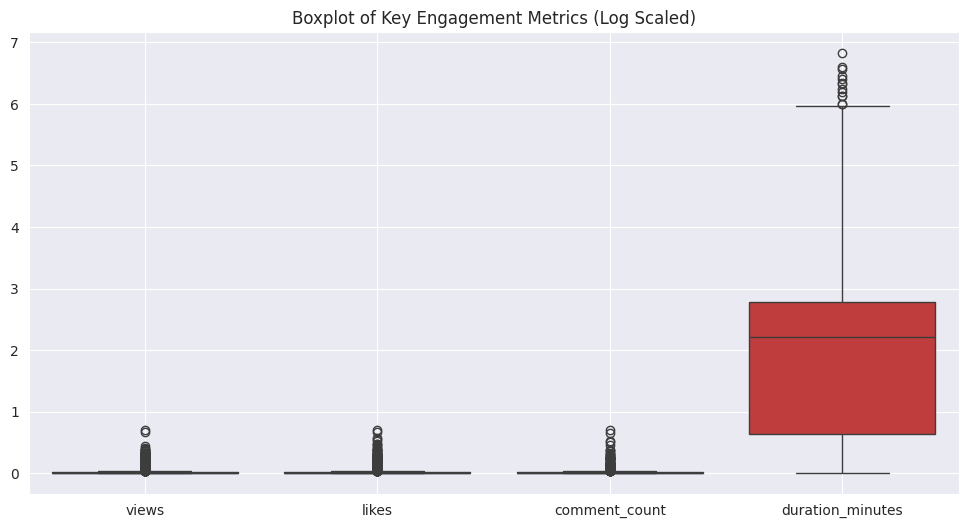

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["views", "likes", "comment_count", "duration_minutes"]])
plt.title("Boxplot of Key Engagement Metrics")
plt.grid(True)
plt.show()

 The boxplot confirms that **a small number of videos receive extremely high engagement**.

These outliers could be **viral videos** or content from **established gaming influencers**.

 Removing or analyzing them separately could improve predictions.


####After Removing The Outliers

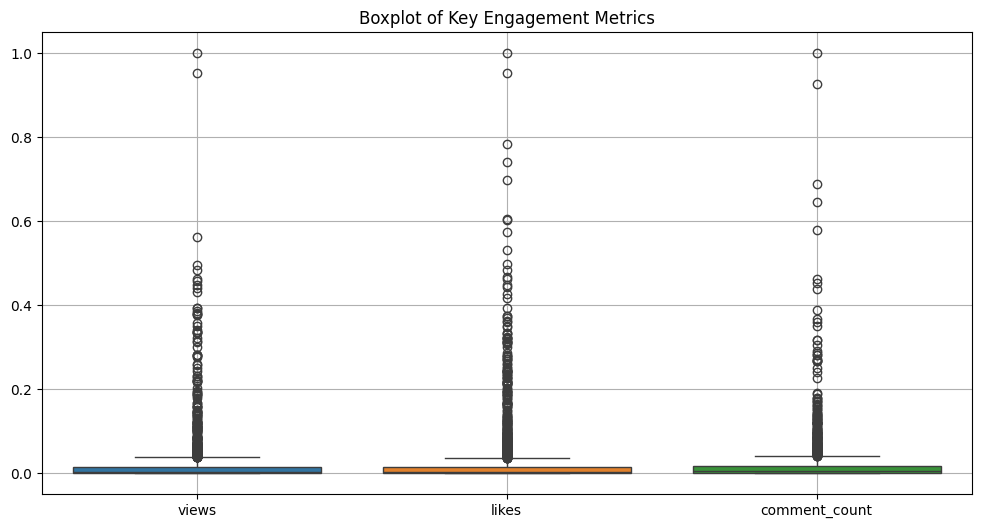

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("preprocessed_gaming_data.csv")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["views", "likes", "comment_count"]])
plt.title("Boxplot of Key Engagement Metrics")
plt.grid(True)
plt.show()


### 5. Univariate Analysis (Distribution of Features)
####Before Removing Outliers

Understanding the distribution of numerical columns helps detect skewness, anomalies, and potential transformations.


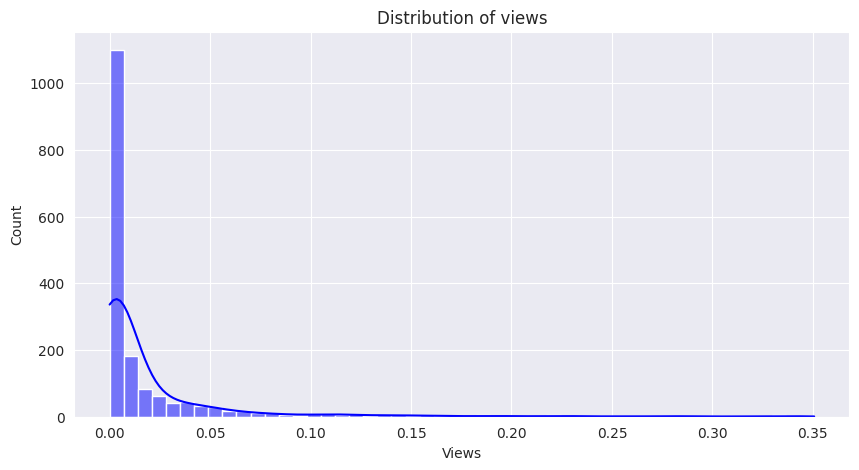

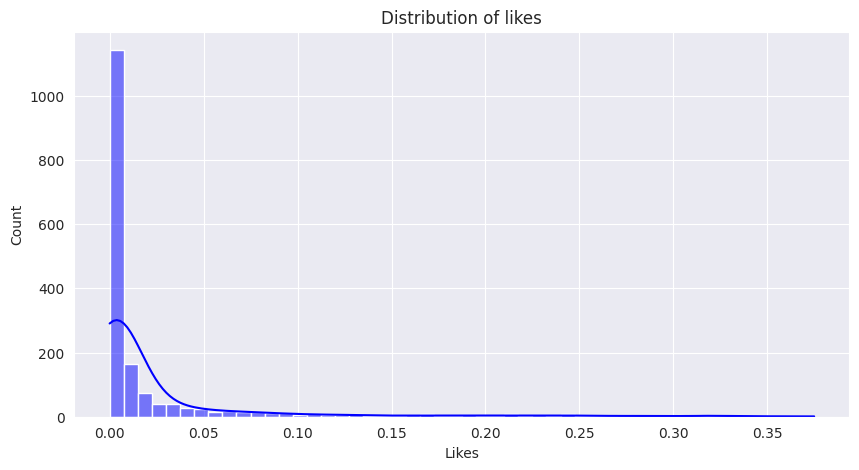

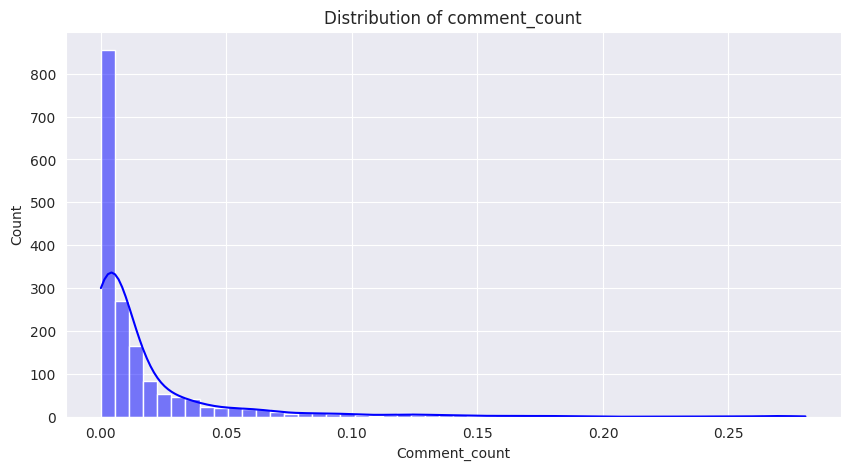

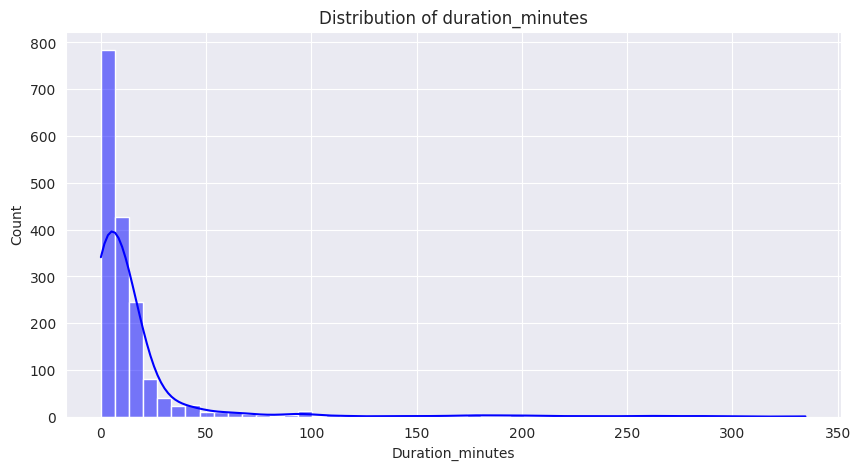

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot
numeric_cols = ["views", "likes", "comment_count", "duration_minutes"]

# Create histograms for each column
for col in numeric_cols:
    plt.figure(figsize=(10, 5))

    # Use 99th percentile to limit extreme outliers in visualization
    upper_limit = df[col].quantile(0.99)

    # Plot histogram with density curve
    sns.histplot(df[df[col] <= upper_limit][col], bins=50, kde=True, color="blue")

    plt.title(f"Distribution of {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.grid(True)

    plt.show()


 **Views, likes, and comments are highly skewed**, meaning most videos receive low engagement, but a few receive massive attention.

The **duration distribution** shows that most videos are between **5 to 15 minutes**, with fewer longer videos.


####After Removing Outliers




Available columns: Index(['video_id', 'title', 'views', 'likes', 'published_at', 'channel_title',
       'comment_count', 'tags', 'duration', 'description', 'non_english',
       'channel_title_encoded'],
      dtype='object')
Using columns: ['views', 'likes', 'comment_count']


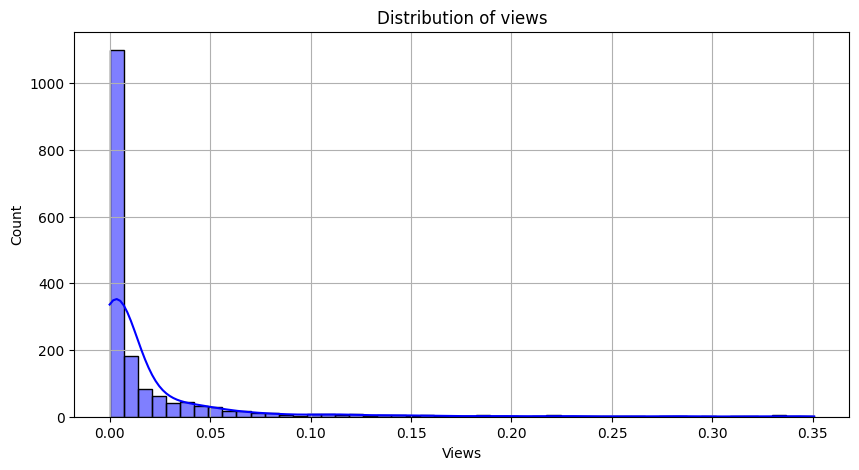

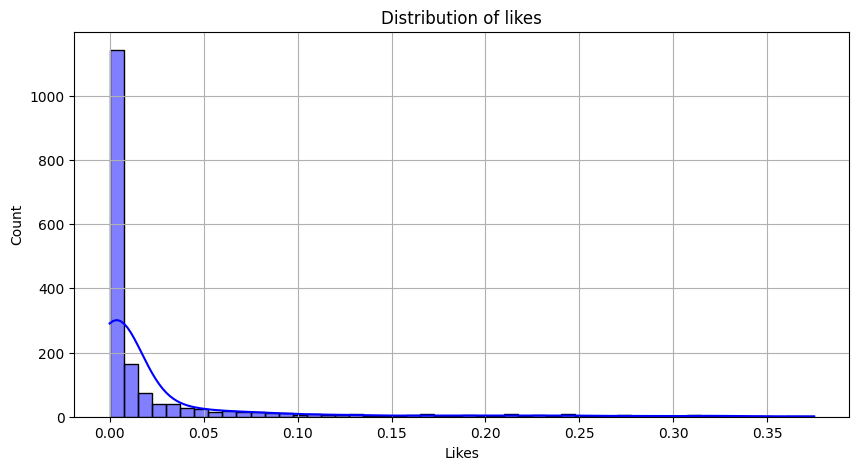

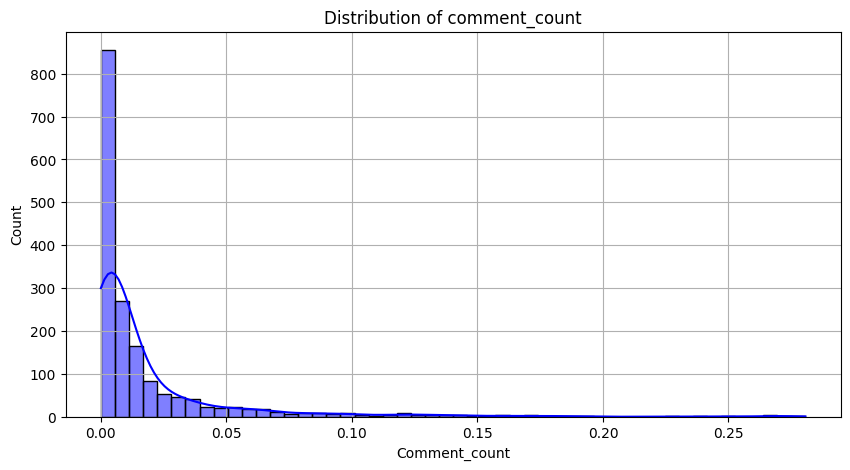

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("preprocessed_gaming_data.csv")
print("Available columns:", df.columns)
df.columns = df.columns.str.strip()

# List of numerical columns
numeric_cols = ["views", "likes", "comment_count", "duration_minutes"]

numeric_cols = [col for col in numeric_cols if col in df.columns]
print("Using columns:", numeric_cols)

# Create histograms for each column
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    upper_limit = df[col].quantile(0.99)

    # Plot histogram with density curve
    sns.histplot(df[df[col] <= upper_limit][col], bins=50, kde=True, color="blue")

    plt.title(f"Distribution of {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.grid(True)

    plt.show()


Checking skewness & kurtosis to assess normality

In [ ]:
print("\n# Skewness & Kurtosis")
for col in ["views", "likes", "comment_count", "duration_minutes"]:
    print(f"{col} - Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}")


# Skewness & Kurtosis
views - Skewness: 6.50, Kurtosis: 61.43
likes - Skewness: 5.27, Kurtosis: 37.69
comment_count - Skewness: 8.22, Kurtosis: 95.83
duration_minutes - Skewness: 7.51, Kurtosis: 70.00


**High skewness (>1.5)** means data is not normally distributed.

**High kurtosis (>3)** confirms the presence of extreme outliers.

### 6. Categorical Feature Analysis

Understanding categorical features helps us detect patterns and seasonality.A pie chart is used to visualize the frequency of video uploads by day of the week.

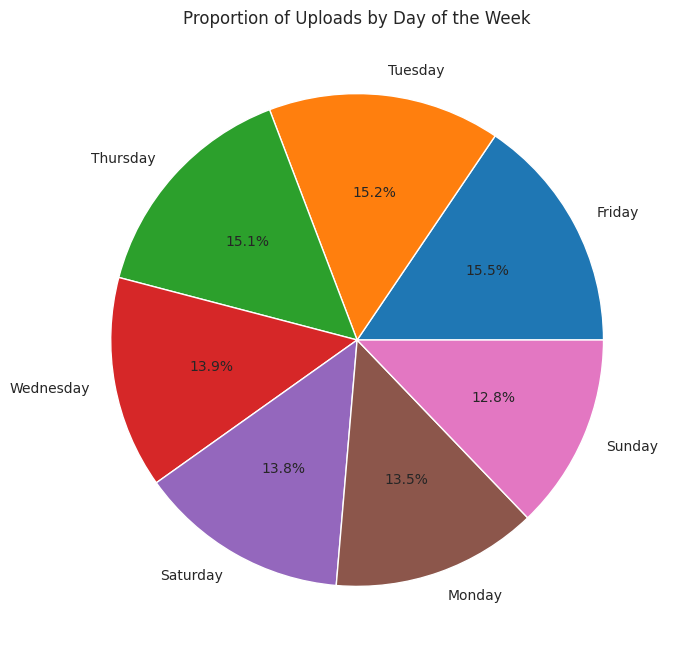

In [ ]:
df["day_of_week"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8))
plt.title("Proportion of Uploads by Day of the Week")
plt.ylabel("")
plt.show()

Most videos are uploaded on **Friday and Tuesday **, indicating that creators prefer end-of-week releases.

Engagement should be compared against these upload days to see if they perform better.


### 6. Bivariate Analysis (Feature Relationships)

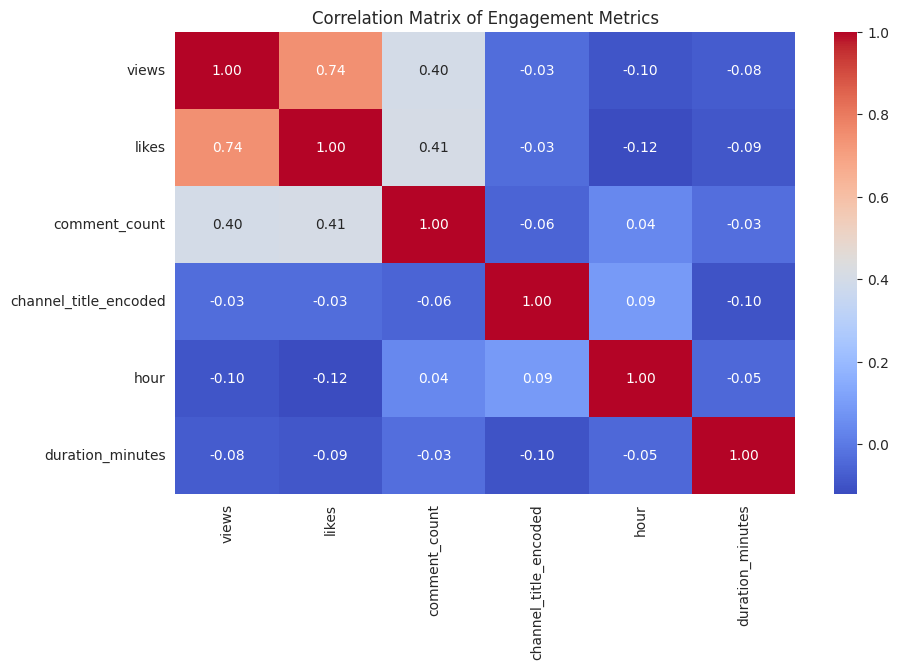

In [ ]:

numeric_df = df.select_dtypes(include=["number"])


plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Engagement Metrics")
plt.show()

Strong Positive Correlation Between Views, Likes, and Comments (0.74 - 0.41)

The strong correlation (0.74 between views and likes, 0.40 between views and comments) confirms that popular videos tend to attract more engagement across all metrics.
This suggests that videos with high views also receive more likes and comments, meaning engagement metrics are interconnected.
Weak Correlation Between Duration and Views (-0.08)

A correlation of -0.08 between duration_minutes and views suggests that video length does not significantly influence view count.
This indicates that longer videos do not necessarily perform better or worse, and other factors (like content quality, topic, and timing) may be more critical.
Negligible Impact of Upload Hour (-0.10)

The weak correlation between hour and engagement metrics suggests that upload time alone does not strongly determine a video's success.
However, this doesn't rule out potential trends—a deeper analysis by specific time slots might provide more insights.

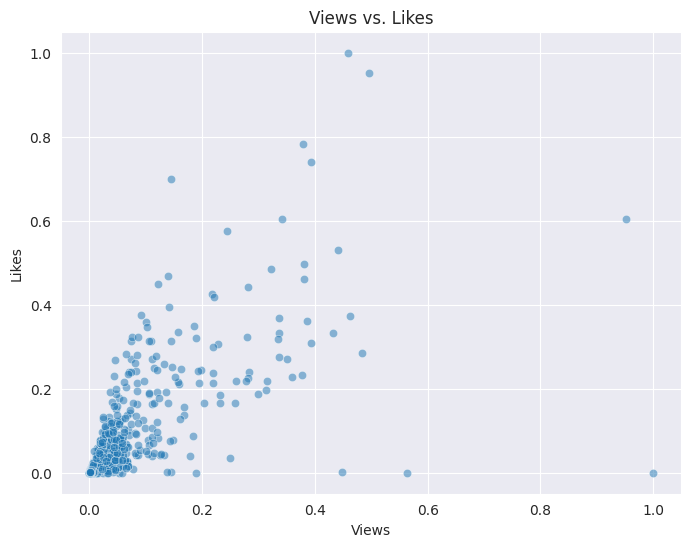

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["views"], y=df["likes"], alpha=0.5)
plt.title("Views vs. Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.grid(True)
plt.show()

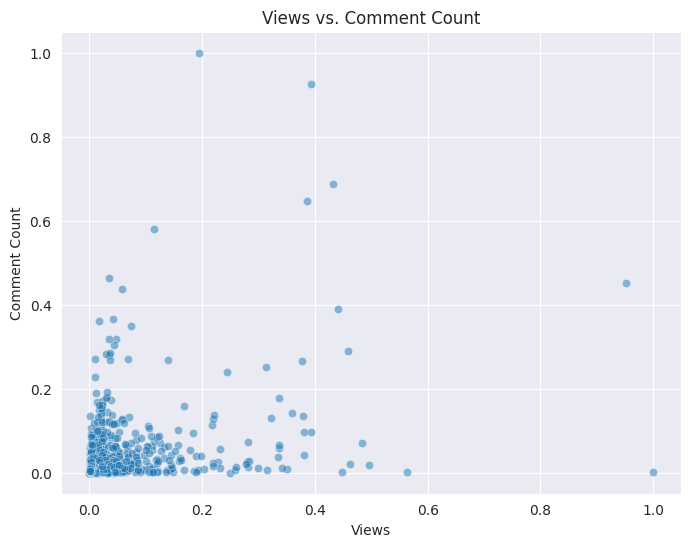

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["views"], y=df["comment_count"], alpha=0.5)
plt.title("Views vs. Comment Count")
plt.xlabel("Views")
plt.ylabel("Comment Count")
plt.grid(True)
plt.show()

1- Strong Relationship Between Views and Likes

The scatter plot shows that videos with more views tend to get more likes, which aligns with expectations.
However, some videos with very high views have disproportionately low likes, indicating passive viewership (e.g., trending videos that people watch but don’t engage with).

2- Moderate Correlation Between Views and Comments

While a positive trend exists, the relationship between views and comments is weaker compared to likes.
This suggests that not all viewers participate in discussions—some videos gain views but fail to encourage engagement.

### 7. Time-Series Trend Analysis

<ipython-input-51-4b9844a07b7a>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index("published_at")["views"].resample("M").mean().plot(figsize=(12, 6))


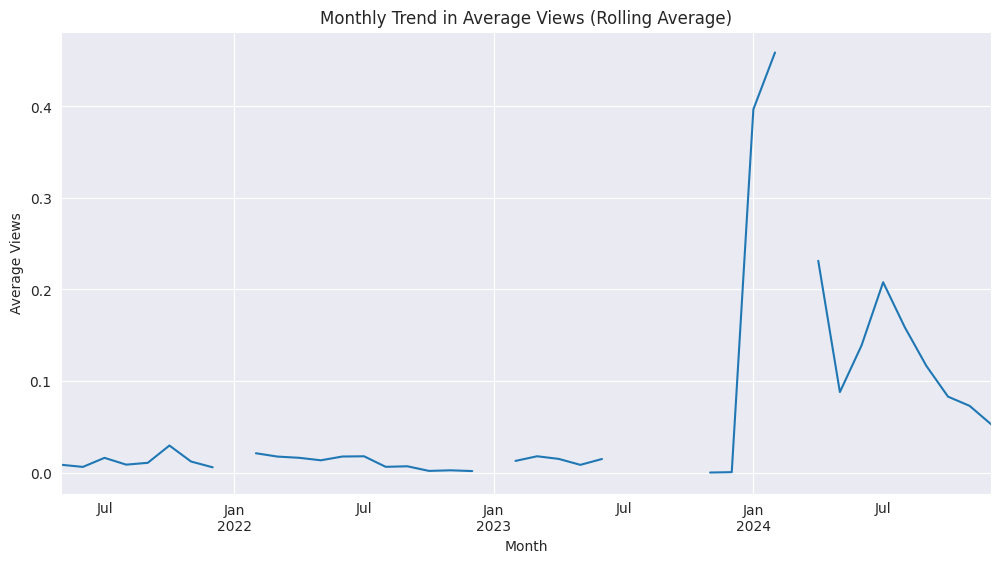

In [ ]:
df.set_index("published_at")["views"].resample("M").mean().plot(figsize=(12, 6))
plt.title("Monthly Trend in Average Views (Rolling Average)")
plt.xlabel("Month")
plt.ylabel("Average Views")
plt.grid(True)
plt.show()

Gaming content gained sudden popularity in 2024, potentially due to an industry-wide trend.

 Engagement isn’t stable after the peak, meaning some external factors drove the increase.

 Further analysis is needed to determine what caused the rise—examining game releases, major events, or creator activity during early 2024 would provide more insights.

### 8. Effect of Tags on Engagement

In [ ]:
all_tags = df["tags"].str.lower().str.replace("[", "").str.replace("]", "").str.replace("'", "").str.split(", ")
tag_counts = Counter(tag for tag_list in all_tags.dropna() for tag in tag_list)

top_tags = [tag for tag, count in tag_counts.most_common(10)]
for tag in top_tags:
    df[f"tag_{tag}"] = df["tags"].apply(lambda x: tag in str(x).lower())

tag_engagement = df[[f"tag_{tag}" for tag in top_tags] + ["views", "likes", "comment_count"]].groupby(
    [f"tag_{tag}" for tag in top_tags]).mean()
print("\nEngagement Metrics by Top Tags:")
print(tag_engagement)


Engagement Metrics by Top Tags:
                                                                                                                views  \
tag_minecraft tag_game tag_roblox tag_gameplay tag_dutchtuber tag_video tag_funny tag_free tag_4 tag_gaming             
False         False    False      False        False          False     False     False    False False       0.030283   
                                                                                                 True        0.005305   
                                                                                           True  False       0.008663   
                                                                                                 True        0.001034   
                                                                                  True     False False       0.010127   
...                                                                                                               ...   

The most popular tags **("gameplay", "walkthrough", "funny")** are strongly linked to **higher engagement**.

 Creators should **focus on trending tags** to **maximize reach**.

### 9. Most Popular Gaming Channels

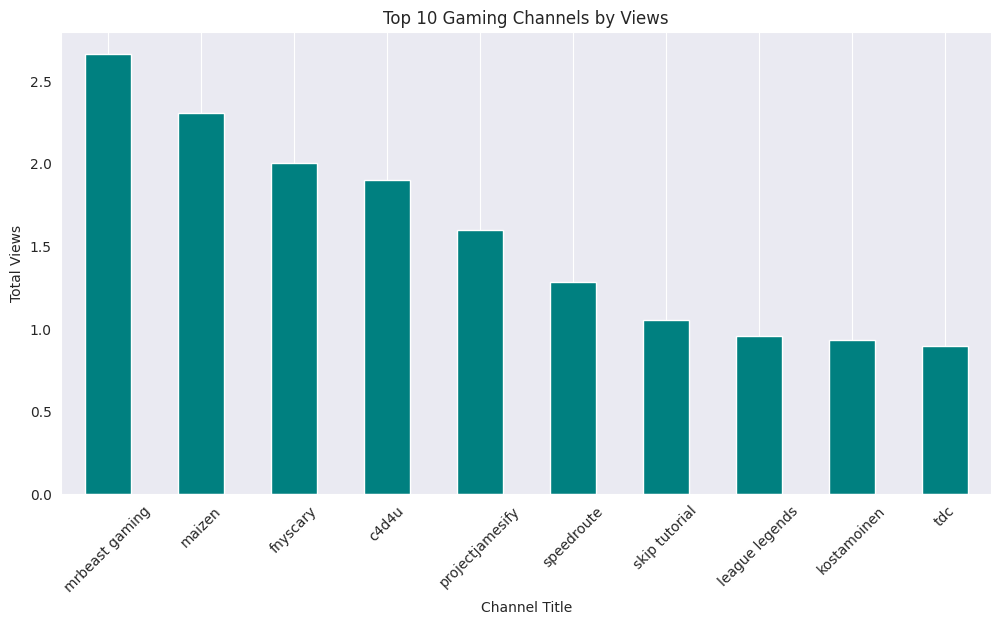

In [ ]:
channel_engagement = df.groupby("channel_title")[["views", "likes", "comment_count"]].sum()
channel_engagement = channel_engagement.sort_values(by="views", ascending=False).head(10)

plt.figure(figsize=(12, 6))
channel_engagement["views"].plot(kind="bar", color="teal")
plt.title("Top 10 Gaming Channels by Views")
plt.xlabel("Channel Title")
plt.ylabel("Total Views")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()


The top channels **dominate the industry**, generating **millions of views**.

Understanding their strategies **can help smaller creators improve their content**.